# Question 1:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

In [2]:
np.random.seed(0)

In [3]:
Y = np.random.choice([0,1], size = 30)

In [4]:
X = np.zeros((30,2))

In [5]:
for i in range(30):
    x1 = 0
    x2 = 0
    if Y[i]:
        x1 = np.random.uniform(2, 7)
        while x1 == 2:                    #Making Checks So that the value 2 is not included, similarly below
            x1 = np.random.uniform(2, 7)
            
        x2 = np.random.uniform(4, 6)
        while x2 == 4:
            x2 = np.random.uniform(4, 6)
    else:
        x1 = np.random.uniform(0, 9)     #Asked to follow u(0,2) U u(7,9)
        while (x1>=2 and x1<=7) or (x1 == 0) or (x1 == 9):
            x1 = np.random.uniform(0, 9)  
            
        x2 = np.random.uniform(1, 8)     #Asked to follow u(1,3) U u(6, 8)
        while (x2>=3 and x2<=6) or (x2 == 1) or (x2 == 8):
            x2 = np.random.uniform(1, 8)
    X[i][0] = x1
    X[i][1] = x2

In [6]:
df = pd.DataFrame(X, Y)
df.columns = ['x1', 'x2']
df.reset_index(inplace=True)
df.rename(columns={'index':'y'}, inplace=True)
df.head(4)

,y,x1,x2
0,0,0.784164,1.141529
1,1,6.163099,5.556314
2,1,6.350061,5.957237
3,0,7.192427,6.463704


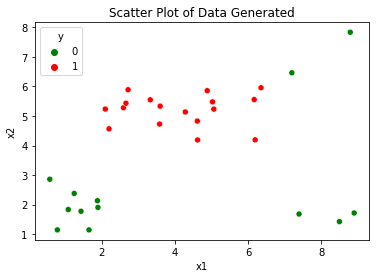

In [7]:
plt.title("Scatter Plot of Data Generated")
plt.xlabel('x1')
plt.ylabel('x2')
sns.scatterplot(x=df['x1'], y = df['x2'], hue=df['y'], palette={0:'green', 1:'red'})
plt.show()

## Part 2 and 3:

In [8]:
#finding right_most point with label 1
max_x1_val = max(X[Y == 1][:, 0])
min_x1_val = min(X[Y == 1][:, 0])
max_x2_val = max(X[Y == 1][:, 1])
min_x2_val = min(X[Y == 1][:, 1])

In [9]:
#Case1
#finding closest points with label 0 to cluster of points with label1
closest_x1_right0 = min(X[(Y == 0) & (X[:, 0] > max_x1_val)][:, 0])
closest_x1_left0 = max(X[(Y == 0) & (X[:, 0] < min_x1_val)][:, 0])

closest_x2_up0_1 = min(X
                       [(Y == 0) & 
                        (X[:, 1] > max_x2_val) & 
                        (X[:, 0] <= closest_x1_right0) &
                        (X[:, 0] >= closest_x1_left0)
                       ][:, 1])
closest_x2_down0_1 = max(X
                         [(Y == 0) & 
                          (X[:, 1] < min_x2_val) &
                          (X[:, 0] >= closest_x1_left0) &
                          (X[:, 0] <= closest_x1_right0)
                         ][:, 1])

In [10]:
# Case 2
#finding closest points with label 0 to cluster of points with label1
closest_x2_up0 = min(X[(Y == 0) & (X[:, 1] > max_x2_val)][:, 1])
closest_x2_down0 = max(X[(Y == 0) & (X[:, 1] < min_x2_val)][:, 1])

closest_x1_left0_2 = min(X
                         [(Y == 0) &
                          (X[:, 0] < min_x1_val) &
                          (X[:, 1] >= closest_x2_down0) &
                          (X[:, 1] <= closest_x2_up0)
                         ][:, 0])
closest_x1_right0_2 = max(X
                          [(Y == 0) &
                           (X[:, 0] > max_x1_val) &
                           (X[:, 1] >= closest_x2_down0) &
                           (X[:, 1] <= closest_x2_up0)
                          ][:, 0])

In [11]:
#finding general hypothesis rectangle parameters
area1 = (closest_x1_right0 - closest_x1_left0)  * (closest_x2_up0_1 - closest_x2_down0_1)
area2 = (closest_x2_up0 - closest_x2_down0) * (closest_x1_right0_2 - closest_x1_left0_2)
gx, gy = 0, 0
w, h = 0, 0
if area1 > area2:
    gx, gy = closest_x1_left0, closest_x2_down0_1
    w = closest_x1_right0 - closest_x1_left0
    h = closest_x2_up0_1 - closest_x2_down0_1
else:
    gx, gy = closest_x1_left0_2, closest_x2_down0
    w = closest_x1_right0_2 - closest_x1_left0_2
    h = closest_x2_up0 - closest_x2_down0

In [12]:
import matplotlib.patches as rect

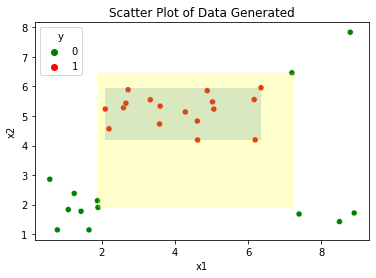

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
specific_hypothesis = rect.Rectangle((min_x1_val, min_x2_val), max_x1_val - min_x1_val, max_x2_val - min_x2_val, alpha = 0.2)
general_hypothesis = rect.Rectangle((gx, gy), w, h, alpha = 0.2, color = 'yellow')
ax.add_patch(specific_hypothesis)
ax.add_patch(general_hypothesis)
plt.title("Scatter Plot of Data Generated")
plt.xlabel('x1')
plt.ylabel('x2')
sns.scatterplot(x=df['x1'], y = df['x2'], hue=df['y'], palette={0:'green', 1:'red'})
plt.show()

In [14]:
specific_centre = ((min_x1_val+max_x1_val)/2, (min_x2_val+max_x2_val)/2)
specific_rad = max((max_x1_val - min_x1_val)/2, (max_x2_val - min_x1_val)/2)

In [15]:
general_rad = max(w/2, h/2)

In [16]:
general_centre = (gx + general_rad, gy+general_rad)

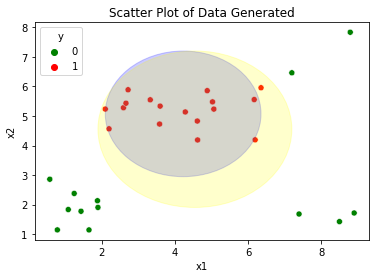

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
specific_hypothesis = plt.Circle((specific_centre), specific_rad, fill = True, alpha = 0.2, color = "blue") 
general_hypothesis = plt.Circle((general_centre), general_rad, fill = True, alpha = 0.2, color = "yellow") 
ax.add_patch(specific_hypothesis)
ax.add_patch(general_hypothesis)
plt.title("Scatter Plot of Data Generated")
plt.xlabel('x1')
plt.ylabel('x2')
sns.scatterplot(x=df['x1'], y = df['x2'], hue=df['y'], palette={0:'green', 1:'red'})
plt.show()

## The General Hypothesis for rectangle classes by definition is actually an infinite strip
## For the circle case computing general and specific hypothesis is computationally difficult.
## It seems to me the class of circle does better in representing the hypothesis class as the maximum area rectangle can squeeze through gaps and give no significant information